# Probability Review

### First, a look at the `numpy.random` module

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns


https://numpy.org/doc/stable/reference/random/generator.html#distributions

In [33]:
def hist_plotter(data, title="", bins=20):
    plt.figure(dpi=100)
    plt.hist(data, density=True, bins=bins, alpha=0.6)
    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("Density")
    sns.despine()
    plt.show()

### The basic `np.random` functions

**Uniform Random Variables**

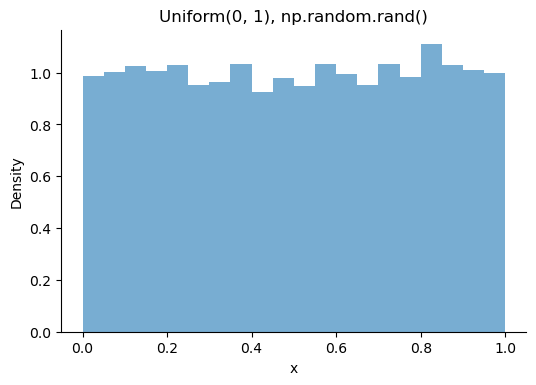

In [34]:
data  = np.random.rand(10000)
hist_plotter(data, "Uniform(0, 1), np.random.rand()")

**Normal Random Variables**

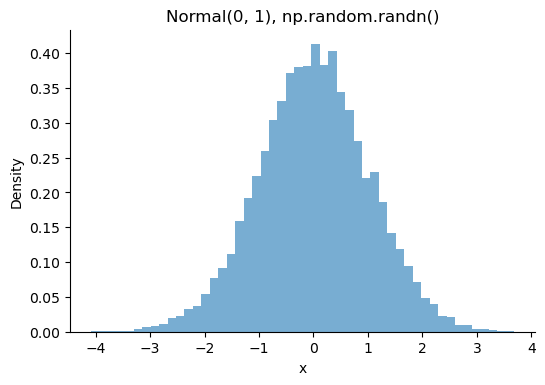

In [35]:
data  = np.random.randn(10000)
hist_plotter(data, "Normal(0, 1), np.random.randn()", bins=50)

**Choice**

In [36]:
np.random.choice([4, 8, 10, 100], size=3, replace=False) # no replacement

array([ 8,  4, 10])

In [37]:
np.random.choice([4, 8, 10, 100], size=4, replace=True) # allow replacement

array([ 4,  4,  8, 10])

**Random Integers**

In [38]:
np.random.randint(5, 30, size=15) 

array([27, 27,  6, 18, 11, 15, 26, 11, 27, 13, 26,  9, 24, 18, 17])

**Shuffle**

Note! This is an _inplace_ operation - be careful doing this

In [39]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [40]:
np.random.shuffle(a)
print(a)

[9 2 1 7 5 6 0 4 3 8]


## Important Distributions

### Gaussian (Normal)

This will probably be the most important distribution throughout the course.

Density for a univariate normal,
$$
p(x) = \frac{1}{\sqrt{2 \pi} \sigma}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}
$$

Density for a multivariate normal,
$$
p(\mathbf{x}) = (2 \pi)^{-k/2} | \Sigma |^{-1/2} e^{-\frac{1}{2}(\mathbf{x} - \mathbf{\mu})^T \Sigma^{-1}(\mathbf{x} - \mathbf{\mu})}
$$

**Why do we care about this?**

- It's very common to observe:
    - Height is normally distributed
    - Stock returns are normally distribued
    - Birth weight
    - the list goes on
- Central Limit Theorem
    - $X_1, \dots, X_n$ are random samples with mean $\mu$ and _finite_ variance $\sigma^2$ then
$$
\lim_{n\rightarrow \infty} \sqrt{n}\left(\frac{\bar{X}_n - \mu}{\sigma}\right) = Z \sim N(0, 1)
$$
    - Can approximate arbitrary distributions using the Standard Normal
    
    
- Hugely useful properties for making models
    - Closure under addition
    - Closure under marginalization
    - Closure under conditioning
    
These mean that if we have a big joint normal distribution and we either want to average out over some of the components, or condition on seeing some components, we still have a normal!

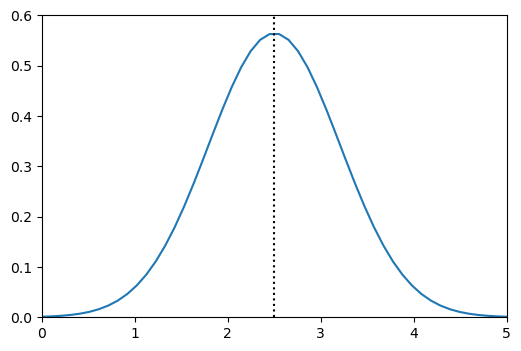

In [41]:
from scipy.stats import multivariate_normal

x = np.linspace(0, 5)
mu = 2.5
y = multivariate_normal.pdf(x, mean=mu, cov=0.5)
fig = plt.figure(dpi=100)
plt.plot(x, y)
plt.ylim(0, 0.6)
plt.xlim(x.min(), x.max())
plt.axvline(mu, linestyle=':', color='k')

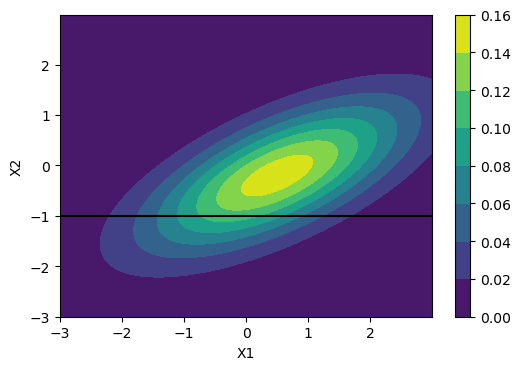

In [42]:
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0.5, -0.2], [[2.0, 0.95], [0.95, 1.]])
dens = rv.pdf(pos)


plt.figure(dpi=100)
plt.contourf(x, y, dens, levels=8)
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")

plt.axhline(-1, color='k')

plt.show()

**Plot The Conditional Distributions**

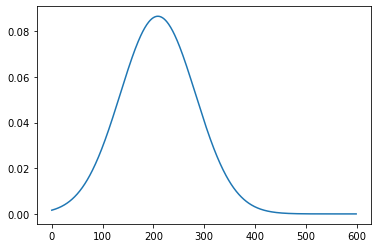

In [43]:
## DEMO
plt.plot(dens[200, :])

**Plot The Marginal Distributions**

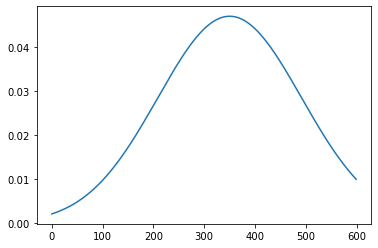

In [44]:
## DEMO

marginal = np.mean(dens, -1)

plt.plot(marginal)

### Uniform

$X \sim Unif(a, b)$ means $X$ is equally likely to take on any value in $[a, b]$

A helpful tip is that you can always transform samples from $Unif(0, 1)$ into $Unif(a, b)$.

Let $X \sim Unif(0, 1)$, then $(a + (b-a)X)\sim Unif(a, b)$

### Bernoulli

This is the coin flip random variable, just a single failure/success trial. Say $X \sim Bernoulli(p)$

$$
P(X=1) = p
$$

Notably, $E[X] = P(X = 1) = p$, meaning we can exchange probabilities and expectations in some sense here.

### Binomial

The outcome of a _series_ of Bernoulli trials. Say $X\sim Binom(n, p)$ to say we have $n$ Bernoulli's each with parameter $p$.

$$
P(X=k) = \binom{n}{k}p^{k}(1-p)^{n-k}
$$

### Beta

Flexible, continuous distribution in $[0,1]$. $X\sim Beta(\alpha, \beta)$

$$
p(x) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha, \beta)} \qquad \textrm{where} \qquad B(\alpha, \beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha+\beta)}
$$

**Question:** Why might we be interested in flexible distributions over $[0,1]$? 

## Conjugate Prior

$$
P(q) = \frac{q^{\alpha-1}(1-q)^{\beta-1}}{B(\alpha, \beta)}
$$
$$
P(X=k|q) = \binom{n}{k}q^{k}(1-q)^{n-k}
$$

$$
P(q | \mathcal{D}) \propto q^{\alpha-1}(1-q)^{\beta-1}q^{k}(1-q)^{n-k}
$$


$$
P(q | \mathcal{D}) \propto q^{k + \alpha-1}(1-q)^{n-k + \beta-1}
$$

$$
P(q | \mathcal{D}) = \frac{q^{k + \alpha-1}(1-q)^{n-k + \beta-1}}{B(k + \alpha, n-k+\beta)}
$$

### Gamma

Distribution over postive values. Can be written in terms of the shape and scale, $k$ and $\theta$, or the shape and rate, $\alpha$ and $\beta$. 

In the shape and scale parameterization, if $k$ is an integer then a Gamma$(k, \theta)$ distribution is equivalent to the sum of $k$ independent exponentially distributed random variables with scale parameter $\theta$. 

$$
p(x) = \frac{1}{\Gamma(k)\theta^k}x^{k-1}e^{-\frac{x}{\theta}}
\quad
\textrm{or}
\quad
p(x) = \frac{\beta^{\alpha}}{\Gamma(k)}x^{\alpha-1}e^{-\beta x}
$$


**What does this mean about the sum of gamma random variables?**

### Question From the Placement Test

Given two independent Gaussian RVs, $U \sim N(-1, 1)$ and $V\sim N(1,1)$ are the following also Gaussian? What are their means and (co)-variances?

- $Y = U + V$

- $Z = U \cdot V$

- $T =  \left( \begin{array}{c}
U + V \\
U - 2V \end{array} \right)$

- $W = \left\{ \begin{array}{ll}
         U & \mbox{with 50% chance}\\
         V & \mbox{with 50% chance}\end{array} \right.$

**Product of _Densities_ vs Product of _Random Variables_**

In [45]:
from scipy import stats

In [46]:
unif01 = stats.uniform(0, 1)
unif45 = stats.uniform(4, 1)

In [47]:
ns = 5000
unif01_sample = unif01.rvs(size=ns)
unif45_sample = unif45.rvs(size=ns)

In [48]:
domain = np.linspace(-1, 6, 1000)

In [49]:
unif01_dens = unif01.pdf(domain)
unif45_dens = unif45.pdf(domain)

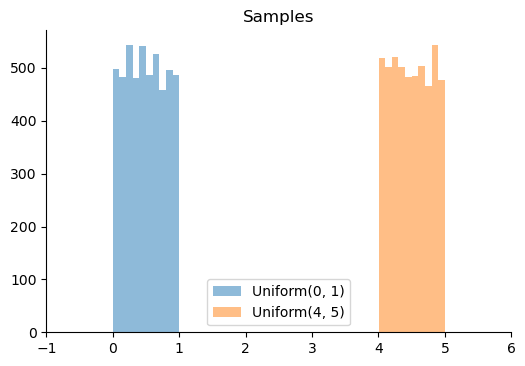

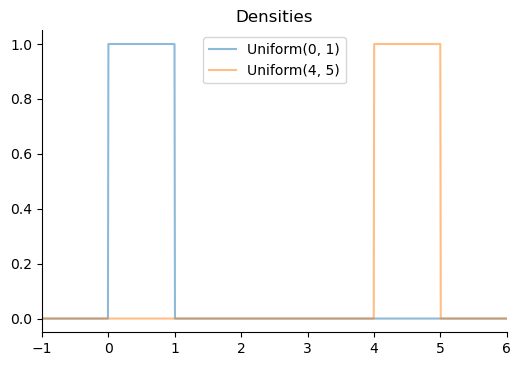

In [50]:
plt.figure(dpi=100)
plt.hist(unif01_sample, alpha=0.5, label="Uniform(0, 1)")
plt.hist(unif45_sample, alpha=0.5, label="Uniform(4, 5)")
plt.legend()
sns.despine()
plt.title("Samples")
plt.xlim(domain.min(), domain.max())
plt.show()

plt.figure(dpi=100)
plt.plot(domain, unif01_dens, alpha=0.5, label="Uniform(0, 1)")
plt.plot(domain, unif45_dens, alpha=0.5, label="Uniform(4, 5)")
plt.legend()
sns.despine()
plt.title("Densities")
plt.xlim(domain.min(), domain.max())
plt.show()

In [51]:
dens_prod = unif01.pdf(domain) * unif45.pdf(domain)
sample_prod = unif01_sample * unif45_sample

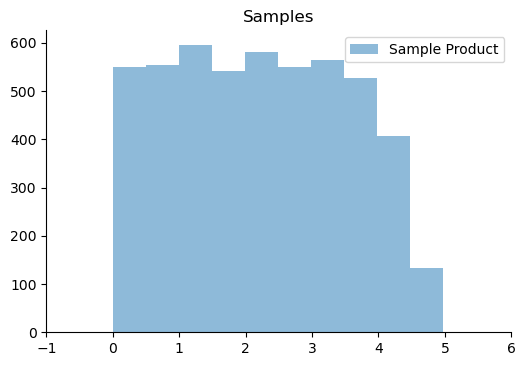

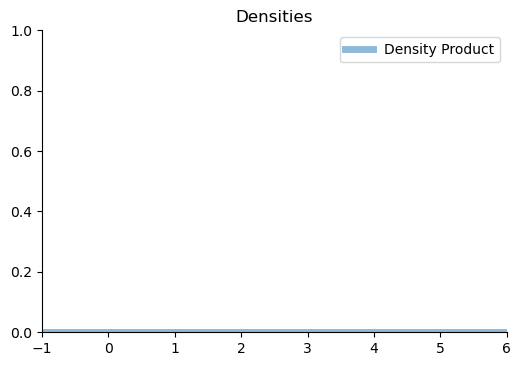

In [52]:
plt.figure(dpi=100)
plt.hist(sample_prod, alpha=0.5, label="Sample Product")
plt.legend()
sns.despine()
plt.title("Samples")
plt.xlim(domain.min(), domain.max())
plt.show()

plt.figure(dpi=100)
plt.plot(domain, dens_prod, alpha=0.5, label="Density Product",
        linewidth=5.)
plt.legend()
sns.despine()
plt.title("Densities")
plt.xlim(domain.min(), domain.max())
plt.ylim(0, 1.)
plt.show()

## Okay - Back to the Questions

$Y = U + V$

Use the _moment generating function_

$$
M_{U}(t) = E[e^{tU}]
$$

Note that
$$
E[e^{t(U + V)}] = E[e^{tU}e^{tV}] = E[e^{tU}]E[e^{tV}] = M_{U}(t)M_{V}(t)
$$

For a normal, $M_{U}(t) = \exp\left(\mu_{u} t + \frac{\sigma_{u}^2 t^2}{2}\right)$

Then
$$
M_{U}(t)M_{V}(t) = \exp\left((\mu_{u} + \mu_{v} )t + \frac{(\sigma_{u}^2 + \sigma_{v}^2) t^2}{2}\right)
$$

So the sum of normal random variables is normal with mean $\mu_{u} + \mu_{v}$ and variance $\sigma_{u}^2 + \sigma_{v}^2$.

$ Z = U\cdot V$

First, decompose $U\cdot V$,
$$
U\cdot V = \frac{1}{4}(U + V)^2 - \frac{1}{4}(U - V)^2.
$$

We know that $U+V$ and $U - V$ are normal from the last question. Thus $(U+V)^2$ and $(U-V)^2$ are chi-squared distributed, and a linear combination of chi-squared distributions is _not_ normal.

Let's do this the easy way though.

In [53]:
nx = 10000
U = (np.random.randn(nx) + 1) * 1
V = (np.random.randn(nx) - 1) * 1

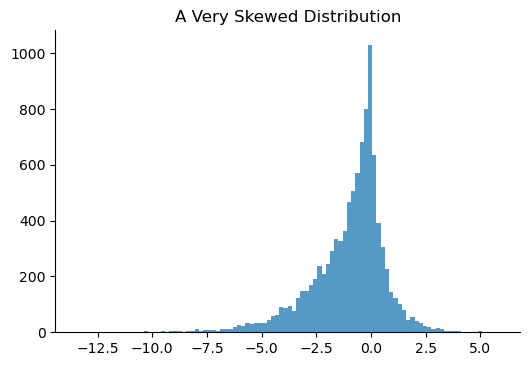

In [54]:
plt.figure(dpi=100)
plt.hist(U*V, bins=100, alpha=0.75)
plt.title("A Very Skewed Distribution")
sns.despine()
plt.show()

$
T =  \left( \begin{array}{c}
U + V \\
U - 2V \end{array} \right)
$

We already know this is a multivariate normal from the first part. Now we just need the covariance.


In general.
$$
Cov(X + Y, W + Z) = Cov(X, W) + Cov(X, Z) + Cov(Y, W) + Cov(Y, Z)
$$
And
$$
Cov(a\, X, Y) = a\, Cov(X, Y)
$$

So
$$
Cov(U + V, U-2V) = Cov(U, U) - 2Cov(V, V) = -1
$$


$$
T \sim N \left( \left[\begin{array}{c}
0 \\
-1 \end{array}\right], 
\left[\begin{array}{cc}
2, &   -1 \\
-1, & 3 \end{array}\right] \right)
$$

$W = \left\{ \begin{array}{ll}
         U & \mbox{with 50% chance}\\
         V & \mbox{with 50% chance}\end{array} \right.$

Let's step back for a second and think about it. 

Suppose $U \sim N(50, 1)$ and $V \sim N(-50, 1)$. What is the mean of $W$? What is the mode?

In [55]:
nx = 10000
mu = 2.
U = np.random.randn(nx) + mu
V = np.random.randn(nx) - mu

W = np.concatenate((U, V))

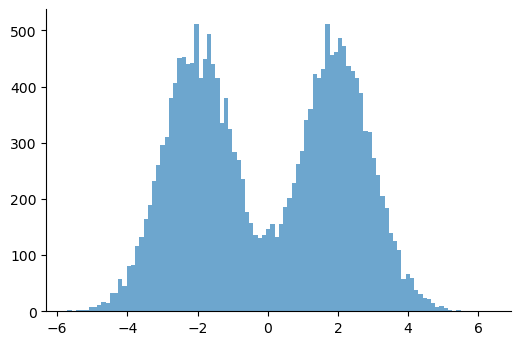

In [56]:
plt.figure(dpi=100)
# plt.xlim(-2, 2)
plt.hist(W, bins=100, alpha=0.65)
sns.despine()
plt.show()

## Numerical MLE Example

Suppose that I come up with a lossy compression algorithm that compresses the data stochastically, so I am left with a file that is between 0 and 100% the original size of the file.

In [57]:
data = np.load("./compressions.npy")

<class 'numpy.ndarray'>


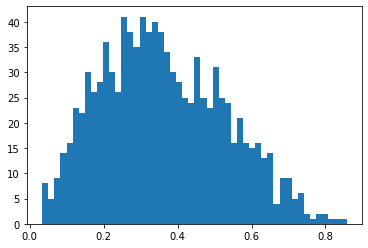

In [76]:
plt.hist(data, bins=50)

print(type(data))

How should we model this? 

$$
\ell(\alpha, \beta|X) = \frac{1}{B(\alpha, \beta)^{1000}}\prod_{i=1}^{1000}x_i^{\alpha-1}(1-x_i)^{\beta-1}
$$

Can we define a log-likelihood?

$$
-\log \ell(\alpha, \beta | X) \propto -1000 * \log(B(\alpha, \beta)) + \sum(\alpha-1)\log( x_i)  + (\beta - 1)\log(1-x_i)
$$

$$
-\log \ell(\alpha, \beta | X) \propto -1000 * (\log(\Gamma(\alpha + \beta))- \log\Gamma(\alpha) - \log\Gamma(\beta)) + \sum(\alpha-1)\log( x_i)  + (\beta - 1)\log(1-x_i)
$$

In [59]:
from scipy.special import gamma
from scipy import optimize

In [73]:
def nll(a, b):
    return -1000 * (np.log(gamma(a + b)) - np.log(gamma(a)) - np.log(gamma(b))) - (a-1) * np.sum(np.log(data)) - (b-1)*np.sum(np.log(1-data))

Can we plot and optimize the log likelihood?

In [61]:
def nll_objective(pars):
    return -1000 * (np.log(gamma(pars[0] + pars[1])) - np.log(gamma(pars[0])) - np.log(gamma(pars[1]))) - (pars[0]-1) * np.sum(np.log(data)) - (pars[1]-1)*np.sum(np.log(1-data))


In [62]:
output = optimize.minimize(nll_objective, x0 = np.array([4,4]), bounds=((0.01, 10.), (0.01, 10.)))

In [63]:
nll_min = nll_objective(output['x'])

In [64]:
alpha = np.linspace(0.01, 7)
beta = np.linspace(0.01, 7)

agrid, bgrid = np.meshgrid(alpha, beta)

In [65]:
nlls = nll(agrid, bgrid)

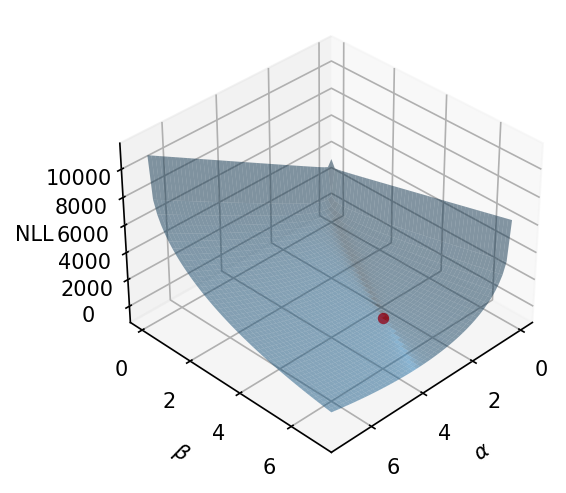

In [66]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.plot_surface(agrid, bgrid, nlls, alpha=0.5)
ax.scatter(output['x'][0], output['x'][1], nll_min, color='red')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_zlabel('NLL')
ax.view_init(35, 45)
plt.show()

In [67]:
output['x']

array([2.67909063, 4.73528672])

In [68]:
fit_beta = stats.beta(output['x'][0], output['x'][1])

In [69]:
domain = np.linspace(0, 1)
fit_dens = fit_beta.pdf(domain)

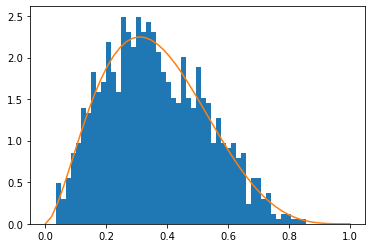

In [70]:
plt.hist(data, density=True, bins=50)
plt.plot(domain, fit_dens)